In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import random
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
boston_dataset = load_boston()

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [16]:
X_train = X[0:400]
Y_train = Y[0:400]
X_test = X[400:507]
Y_test = Y[400:507]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 13) (400,)
(106, 13) (106,)


In [17]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_new = scaler.transform(X_train)

In [276]:
clf = SGDRegressor()
clf.fit(X_train_new, Y_train)
print(mean_squared_error(Y_test, clf.predict(X_test)))

29.7816004921


In [23]:
print(X_train.shape[0])
print(type(X_train))

400
<class 'numpy.ndarray'>


In [31]:
print(Y_train.shape[0])

400


In [84]:
def mse(random_y_sample, initial_w, initial_b, random_x_sample):
    for index, ind_x in enumerate(random_x_sample):
        loss = (random_y_sample[index] - (np.dot(initial_w, ind_x) + initial_b))**2
    return loss/len(random_x_sample)

In [295]:
def stochastic_gradient_descent():
    train_loss = []
    test_loss = []
    learning_rate = 0.001
    epochs = 500
    initial_w = np.random.rand(13)
    initial_b = np.random.rand()
    next_w = next_b = 0
    for each_epoch in range(epochs):
        random_array = np.random.randint(1, X_train.shape[0])
        random_x_sample = X_train[:random_array]
        random_y_sample = Y_train[:random_array]
        
        for index, each_x in enumerate(random_x_sample):
            next_w += -2 * each_x * (random_y_sample[index] - np.dot(initial_w.T, each_x))
            next_b += -2 * (random_y_sample[index] - np.dot(initial_w.T, each_x))
        initial_w = initial_w - (learning_rate * next_w)
        initial_b = initial_b - (learning_rate * next_b)
        train_loss.append(mse(random_y_sample, initial_w, initial_b, random_x_sample))
        test_loss.append(mse(Y_test, initial_w, initial_b, X_test))
        if (initial_w == next_w).all():
            break
        else:
            learning_rate = learning_rate/2
        
    return learning_rate, train_loss, test_loss, initial_w, initial_b

In [296]:
learning_rate, train_loss, test_loss, w, b = stochastic_gradient_descent()
print(mse(Y_test, w, b, X_test))

20.8823049931


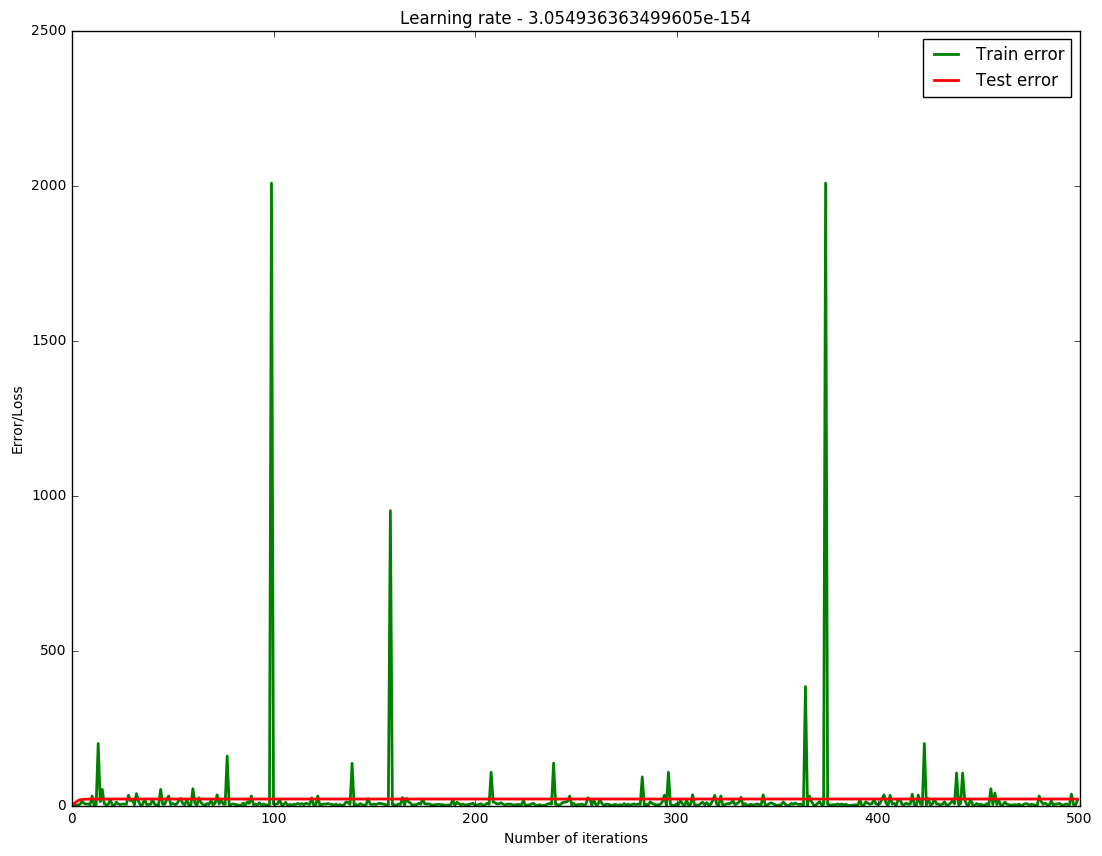

In [297]:
plt.figure(figsize=(13, 10))
plt.plot(range(len(train_loss)), train_loss, color='green', lw=2, label='Train error')
plt.plot(range(len(test_loss)), test_loss, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()